In [1]:
import numpy as np
import pandas as pd

import plotly as py
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
#import scikitplot as skplt

# Introduction

# Data Exploration

## Dataset Preview

In [30]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [7]:
# row length and col length 
df.shape

(10127, 23)

In [31]:
# Column Names
columns = df.columns
columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

## Features

CLIENTNUM：Client number - Unique identifier for the customer holding the account  

Attrition_Flag：Flag indicative of account closure in next 6 months (between Jan to Jun 2013)

Customer_Age：Age of the account holder

Gender：Gender of the account holder

Dependent_count：Number of people financially dependent on the account holder

Education_Level：Educational qualification of account holder (ex - high school, college grad etc.)

Marital_Status：Marital status of account holder (Single, Married, Divorced, Unknown)

Income_Category：Annual income category of the account holder

Card_Category：Card type depicting the variants of the cards by value proposition (Blue, Silver and Platinum)

Months_on_book：Number of months since the account holder opened an an account with the lender

Total_Relationship_Count：Total number of products held by the customer. Total number of relationships the account holder has with the bank (example - retail bank, mortgage, wealth management etc.)

Months_Inactive_12_mon：Total number of months inactive in last 12 months

Contacts_Count_12_mon：Number of Contacts in the last 12 months. No. of times the account holder called to the call center in the past 12 months

Credit_Limit：Credit limit

Total_Revolving_Bal：Total amount as revolving balance

Avg_Open_To_Buy：Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1：Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt：Total Transaction Amount (Last 12 months)

Total_Trans_Ct：Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1：Change in Transaction Count (Q4 over Q1)

Avg_Utilization_Ratio：Average Card Utilization Ratio

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactivity

In [10]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [12]:
# Summary of feature data types 
pd.value_counts(df.dtypes)

int64      10
float64     7
object      6
dtype: int64

## Summary Statistics

In [32]:
df.describe().style.background_gradient(cmap="ocean_r")  # 表格美化输出

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,739177606.333663,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,36903783.450231,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,708082083.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,713036770.500000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,717926358.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,773143533.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,828343083.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


## Missing Value Check

In [33]:
# no missing values
total = df.isnull().sum().sort_values(ascending=False)
Percentage = total / len(df)
Percentage

CLIENTNUM                                                                                                                             0.0
Contacts_Count_12_mon                                                                                                                 0.0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    0.0
Avg_Utilization_Ratio                                                                                                                 0.0
Total_Ct_Chng_Q4_Q1                                                                                                                   0.0
Total_Trans_Ct                                                                                                                        0.0
Total_Trans_Amt                                                                                                                       0.0
Total_Amt_Chng_Q4_Q1              

## Remove Irrelevant Columns

In [34]:
# last two columns are calculated columns; not raw data
calculated_cols = np.arange(21, df.shape[1])
calculated_cols
df.drop(df.columns[calculated_cols], axis=1, inplace=True)

# unique id also has no effect in the model-building process 
df.drop("CLIENTNUM", axis=1, inplace=True)

In [35]:
# preview the column names again
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [36]:
# summary statistics (again)
df.describe().style.background_gradient(cmap="ocean_r")

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# EDA

## User Transactions

### Statistics

In [45]:
# Potential features related to transaction count
df_frequency = pd.concat([df['Customer_Age'],
                        df['Total_Trans_Ct'],
                        df['Total_Trans_Amt'],
                        df['Months_Inactive_12_mon'],
                        df['Credit_Limit'],
                        df['Attrition_Flag']],
                       axis=1)

df_frequency.head()

,Customer_Age,Total_Trans_Ct,Total_Trans_Amt,Months_Inactive_12_mon,Credit_Limit,Attrition_Flag
0,45,42,1144,1,12691.0,Existing Customer
1,49,33,1291,1,8256.0,Existing Customer
2,51,20,1887,1,3418.0,Existing Customer
3,40,20,1171,4,3313.0,Existing Customer
4,40,28,816,1,4716.0,Existing Customer


In [46]:
# Live vs. churned customers  
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

### Plots

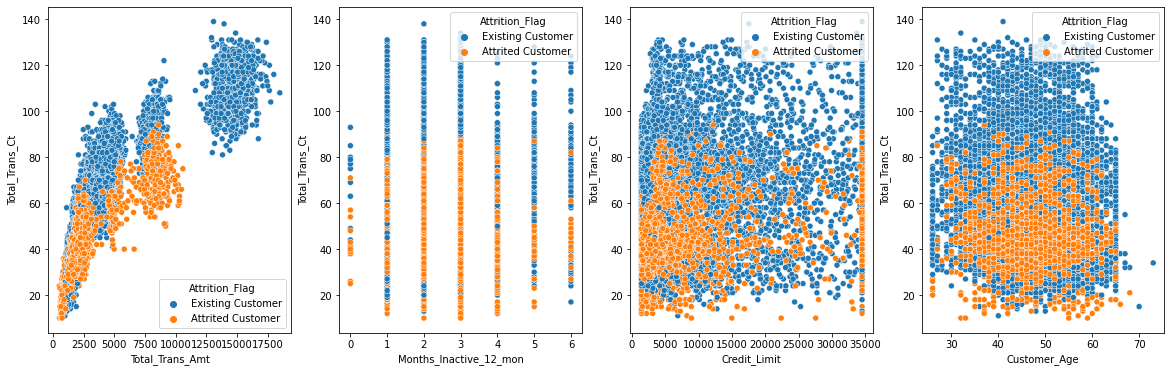

In [47]:
fig, ax = plt.subplots(ncols=4, figsize=(20,6))
sns.scatterplot(data=df_frequency,
                x="Total_Trans_Amt",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[0])

sns.scatterplot(data=df_frequency,
                x="Months_Inactive_12_mon",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[1])

sns.scatterplot(data=df_frequency,
                x="Credit_Limit",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[2])

sns.scatterplot(data=df_frequency,
              x="Customer_Age",
              y="Total_Trans_Ct",
              hue="Attrition_Flag",
              ax=ax[3])

plt.show()

### Findings 

1. Higher number of transcations and higher amount are associated with staying 
2. Most attrited customers are within 2-4 months of inactive status. 
3. Higher credit limit is associated with more chance to stay.
4. Most attrited customers made less than 100 transactions. 
5. Age does not seem to be a key factor for making transactions or staying/leaving. 
6. Proportion in Attried vs. Existing customers in highly imlanaced (8500:1627).

## User Demographics

### Statistics

In [65]:
# preview
df_demographic=df[['Customer_Age',
                   'Gender',
                   'Education_Level',
                   'Marital_Status',
                   'Income_Category',
                   'Attrition_Flag']]

df_demographic.head()

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Attrition_Flag
0,45,M,High School,Married,$60K - $80K,Existing Customer
1,49,F,Graduate,Single,Less than $40K,Existing Customer
2,51,M,Graduate,Married,$80K - $120K,Existing Customer
3,40,F,High School,Unknown,Less than $40K,Existing Customer
4,40,M,Uneducated,Married,$60K - $80K,Existing Customer


In [64]:
# gender distribution
flag_gender = df.groupby(["Attrition_Flag","Gender"]).size().reset_index().rename(columns={0:"number"})
flag_gender

,Attrition_Flag,Gender,number
0,Attrited Customer,F,930
1,Attrited Customer,M,697
2,Existing Customer,F,4428
3,Existing Customer,M,4072


### Plots

In [51]:
# age distributions by customer type
px.violin(df_demographic,
          y="Customer_Age",
          color="Attrition_Flag")

In [61]:
# Age distribution
fig = make_subplots(rows=2, cols=1)

trace1=go.Box(x=df['Customer_Age'],name='Age With Box Plot',boxmean=True)
trace2=go.Histogram(x=df['Customer_Age'],name='Age With Histogram')

fig.add_trace(trace1, row=1,col=1)
fig.add_trace(trace2, row=2,col=1)

fig.update_layout(height=500, width=1000, title_text="User Age Distribution")
fig.show()


In [66]:
fig = px.bar(flag_gender,
             x="Attrition_Flag",
             y="number",
             color="Gender",
             barmode="group",
             text="number")

fig.show()

### Findings 
1. Seems like age is not a determining factor for attrition. 
2. The number of female users is slightly larger than that of male users.
3. Potential imbbalanced data (around 5:1) could lead to a poorer model. 

## Contingency Analysis

### Plots

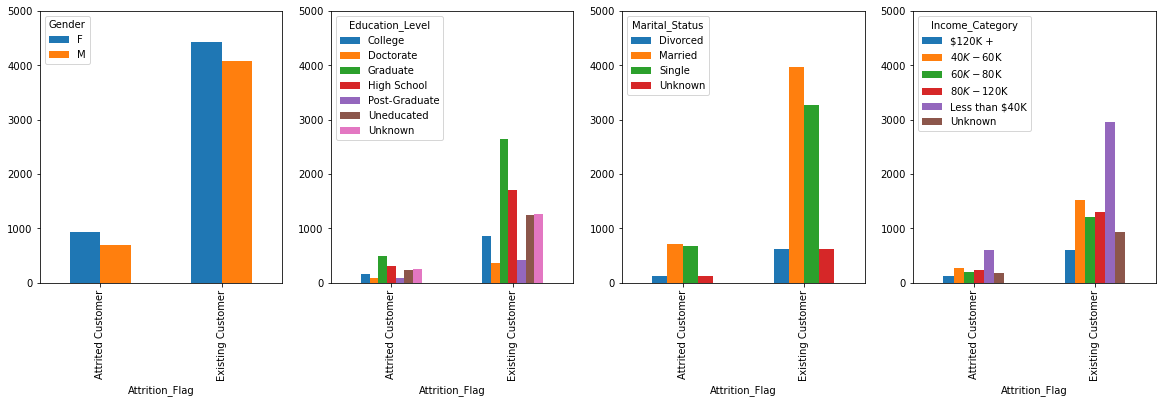

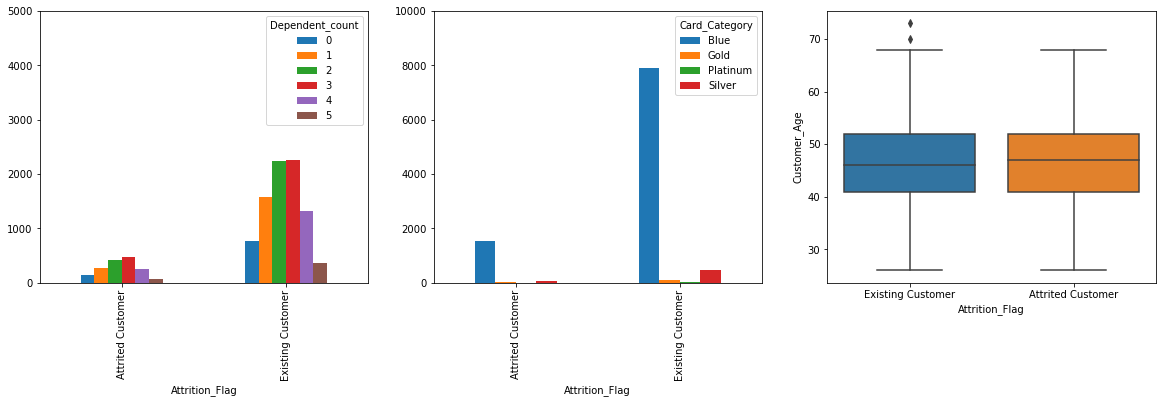

In [69]:
# https://pbpython.com/pandas-crosstab.html

fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(20,5))

pd.crosstab(df["Attrition_Flag"],df["Gender"]).plot(kind="bar", ax=ax1, ylim=[0,5000])
pd.crosstab(df["Attrition_Flag"],df["Education_Level"]).plot(kind="bar", ax=ax2, ylim=[0,5000])
pd.crosstab(df["Attrition_Flag"],df["Marital_Status"]).plot(kind="bar", ax=ax3, ylim=[0,5000])
pd.crosstab(df["Attrition_Flag"],df["Income_Category"]).plot(kind="bar", ax=ax4, ylim=[0,5000])

fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))
pd.crosstab(df['Attrition_Flag'],df['Dependent_count']).plot(kind='bar',ax=ax1, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])

_box = sns.boxplot(data=df_demographic,x='Attrition_Flag',y='Customer_Age', ax=ax3)

plt.show()

### Findings
1. Among two customer types, the distribution in demographics looks similar. 
2. Still, the imbalance in numebr of attrited vs. existing customers might lead to a poor model. Sampling methods could be adopted to mitigate that. 

# Correlation Analysis

Quantitative Variables: Pearson Correlation Coefficient 

Categorical Variables: Cramer's V

https://blog.csdn.net/deecheanW/article/details/120474864

## Categorical (Cramer's V)

### Preview

In [139]:
df_categorical = df.select_dtypes(include="O")
# df_categorical=df.loc[:,df.dtypes==np.object_]
df_categorical.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


### Label Encoding

In [138]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
df_categorical_encoded = pd.DataFrame()

# converting categorical value into numeric
for i in df_categorical.columns:
    df_categorical_encoded[i] = label.fit_transform(df_categorical[i])

df_categorical_encoded.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,1,1,3,1,2,0
1,1,0,2,2,4,0
2,1,1,2,1,3,0
3,1,0,3,3,4,0
4,1,1,5,1,2,0


### Summary

In [118]:
from scipy.stats import chi2_contingency

# define a function for calculating Cramer's V between two features 
def cal_cramers_v(v1,v2):
    crosstab = np.array(pd.crosstab(v1,v2,rownames=None,colnames=None))
    stat = chi2_contingency(crosstab)[0]

    obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1

    return stat / (obs * mini)

# calculate and store the Cramer's V values 
rows = []
for v1 in df_categorical_encoded:
    col = []
    for v2 in df_categorical_encoded:
        cramers = cal_cramers_v(df_categorical_encoded[v1],df_categorical_encoded[v2])
        col.append(round(cramers, 2))
    rows.append(col)

cramers_results = np.array(rows)

cramerv_matrix = pd.DataFrame(cramers_results,
                              columns=df_categorical_encoded.columns,
                              index=df_categorical_encoded.columns)
cramerv_matrix.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
Attrition_Flag,1.0,0.0,0.0,0.0,0.0,0.00
Gender,0.0,1.0,0.0,0.0,0.7,0.01
Education_Level,0.0,0.0,1.0,0.0,0.0,0.00
Marital_Status,0.0,0.0,0.0,1.0,0.0,0.00
Income_Category,0.0,0.7,0.0,0.0,1.0,0.00


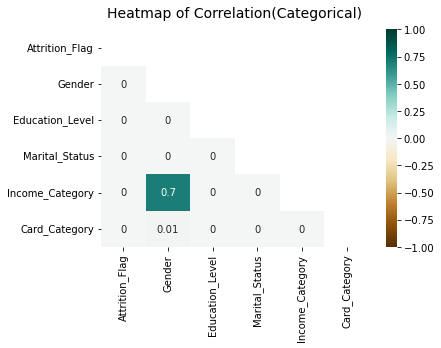

In [119]:
# heat map for the categorical correlations 
mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool_))
cat_heatmap = sns.heatmap(cramerv_matrix,
                          mask=mask,
                          vmin=-1,
                          vmax=1,
                          annot=True,
                          cmap="BrBG")

cat_heatmap.set_title("Heatmap of Correlation(Categorical)", fontdict={"fontsize": 14}, pad=12)

plt.show()

### Findings
1. The attrition flag (whether a customer has left or not) is not correlated with any of the categorical variables.
2. Gender and income category have a moderate correlation (Cramer's V = 0.7), and further analysis would be needed to determine the nature of this relationship.
3. Education level, marital status, and card category are not correlated with any of the other categorical variables.

## Numeric

### Preview

In [134]:
df_number = df.select_dtypes(exclude="O")
#df_number.loc[:, "Attrition_Flag"] = df["Attrition_Flag"].copy()
df_number.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### One-Hot Encoding

In [140]:
df_number['Existing Customer']=df['Attrition_Flag'].apply(lambda x: 1 if x=='Existing Customer' else 0)
df_number['Attrited Customer']=df['Attrition_Flag'].apply(lambda x: 0 if x=='Existing Customer' else 1)

df_number.head()

/var/folders/w6/485md_mn4v5b8yqgwjvgw2gh0000gn/T/ipykernel_55264/183397313.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/w6/485md_mn4v5b8yqgwjvgw2gh0000gn/T/ipykernel_55264/183397313.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Existing Customer,Attrited Customer
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,0


### Summary

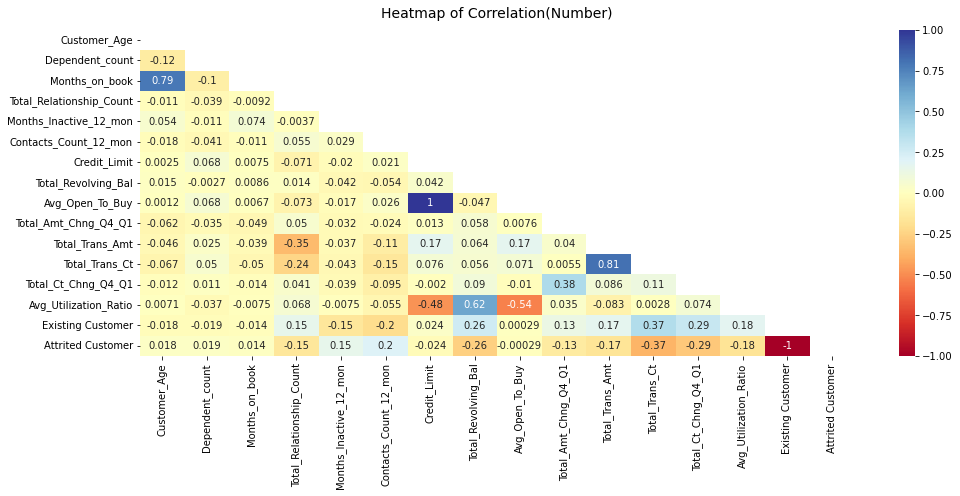

In [137]:
from scipy import stats

num_corr = df_number.corr()
plt.figure(figsize = (16,6))

mask = np.triu(np.ones_like(num_corr, dtype=np.bool_))
heatmap_number = sns.heatmap(num_corr, mask=mask,
                             vmin=-1, vmax=1,
                             annot=True, cmap="RdYlBu")

heatmap_number.set_title("Heatmap of Correlation(Number)", fontdict={"fontsize": 14}, pad=12)

plt.show()

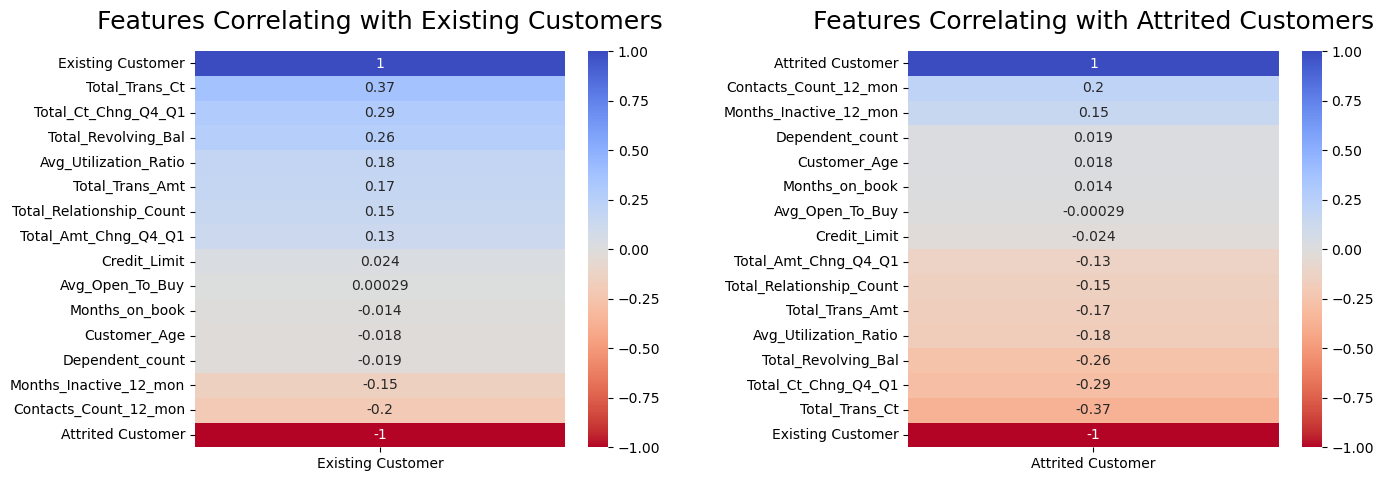

In [90]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

heatmap = sns.heatmap(num_corr[["Existing Customer"]].sort_values(by="Existing Customer", ascending=False),
                     ax=ax[0],
                     vmin=-1,
                     vmax=1,
                     annot=True,
                     cmap="coolwarm_r")
heatmap.set_title("Features Correlating with Existing Customers",fontdict={"fontsize":18}, pad=16);

heatmap = sns.heatmap(num_corr[["Attrited Customer"]].sort_values(by="Attrited Customer", ascending=False),
                     ax=ax[1],
                     vmin=-1,
                     vmax=1,
                     annot=True,
                     cmap="coolwarm_r")
heatmap.set_title("Features Correlating with Attrited Customers",fontdict={"fontsize":18}, pad=16);

fig.tight_layout(pad=5)

plt.show()

### Findings 
1. These variables seem less correlated to attrition flag: Credit Limit, Average Open To Buy, Months On Book, Age, Dependent Count.
2. Consider remove these variables and fit a model. 

# Model-Building

Based on the EDA and correlation analysis, the following variables will be removed before fitting the data into a model. 

## Feature Reduction

In [152]:
df_model = df.copy()
df_model = df_model.drop(['Credit_Limit','Customer_Age','Avg_Open_To_Buy','Months_on_book','Dependent_count'],axis=1)

df_model['Attrition_Flag'] = df_model['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
df_model=pd.get_dummies(df_model) # one-hot encoding

df_model.head()

,Attrition_Flag,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,5,1,3,777,1.335,1144,42,1.625,0.061,...,0,0,1,0,0,0,1,0,0,0
1,1,6,1,2,864,1.541,1291,33,3.714,0.105,...,0,0,0,0,1,0,1,0,0,0
2,1,4,1,0,0,2.594,1887,20,2.333,0.000,...,0,0,0,1,0,0,1,0,0,0
3,1,3,4,1,2517,1.405,1171,20,2.333,0.760,...,0,0,0,0,1,0,1,0,0,0
4,1,5,1,0,0,2.175,816,28,2.500,0.000,...,0,0,1,0,0,0,1,0,0,0


## SMOTE Sampling

Accounts for the data imbalance between two attrition flags

In [160]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# X = df_model.drop("Attrition_Flag", axis=1, inplace=True)
X = df_model.loc[:, df_model.columns != "Attrition_Flag"]
y = df_model["Attrition_Flag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sm = SMOTE(sampling_strategy="minority", k_neighbors=20, random_state=42) # cross-validation

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

## Models

### Initiation

In [163]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

# SVM 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
svm.fit(X_train_res, y_train_res)

# Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('svc', SVC(gamma='auto'))])

# Boosting 
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100,  # number of trees
                                learning_rate=1.0,  # 学习率
                                max_depth=1,   # leaf max depth
                                random_state=42)

gb.fit(X_train_res, y_train_res)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

### Prediction

In [164]:
y_rf = rf.predict(X_test)
y_svm = svm.predict(X_test)
y_gb = gb.predict(X_test)

### Confusion Matrix

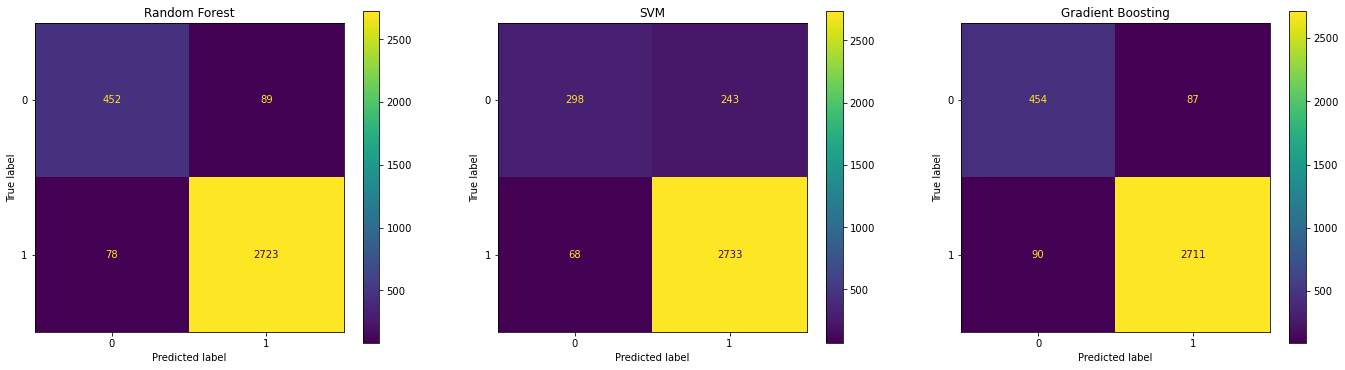

In [168]:
from sklearn.metrics import ConfusionMatrixDisplay

fig,ax=plt.subplots(ncols=3, figsize=(20,6))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=ax[0])
ax[0].title.set_text('Random Forest')

ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, ax=ax[1])
ax[1].title.set_text('SVM')

ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test, ax=ax[2])
ax[2].title.set_text('Gradient Boosting')

fig.tight_layout(pad=5)

plt.show()

### Model Score

In [170]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

print('Random Forest Classifier')
print(classification_report(y_test, y_rf))

print('------------------------')
print('Support Vector Machine')
print(classification_report(y_test, y_svm))

print('------------------------')
print('Gradient Boosting')
print(classification_report(y_test, y_gb))

# precision - % of how many of the predicted positive entries are actually positive
# recall - % of how many of the actually positive entries are correctly predicted as positiv e
# F1 score - average of precision and recall 

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       541
           1       0.97      0.97      0.97      2801

    accuracy                           0.95      3342
   macro avg       0.91      0.90      0.91      3342
weighted avg       0.95      0.95      0.95      3342

------------------------
Support Vector Machine
              precision    recall  f1-score   support

           0       0.81      0.55      0.66       541
           1       0.92      0.98      0.95      2801

    accuracy                           0.91      3342
   macro avg       0.87      0.76      0.80      3342
weighted avg       0.90      0.91      0.90      3342

------------------------
Gradient Boosting
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       541
           1       0.97      0.97      0.97      2801

    accuracy                           0.95      3342
   macro avg

### Findings 
1. RF and GB models perform similarly well, with high precision, recall, and F1-scores for both classes. 
2. SVM performs worse on the minority class (class 0), with lower precision and recall.

## Fine-Tune

Fine tune RF and GB model based on random search and grid search. 

### RF - Random Search

In [189]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]

max_features = ['auto', 'sqrt']
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [190]:
random_grid = {'n_estimators': n_estimators, # number of trees
               'max_features': max_features, # number of features when looking for the best split 
               'max_depth': max_depth,
               'min_samples_split': min_samples_split, # number of samples required to split internal node 
               'min_samples_leaf': min_samples_leaf, # number of samples required to reach leaf node 
               'bootstrap': bootstrap}

In [192]:
rf_random = RandomizedSearchCV(
    estimator = rf, 
    param_distributions=random_grid,
    n_iter=30,
    cv=3, # why 3 fold 
    verbose=2, # ? 
    random_state=42,
    n_jobs=-1)

rf_random.fit(X_train_res, y_train_res)
print(rf_random.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.8s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   5.0s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  19.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  22.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  22.3s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=6

Random Forest Classifier (Optimized)
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       541
           1       0.97      0.97      0.97      2801

    accuracy                           0.95      3342
   macro avg       0.91      0.90      0.91      3342
weighted avg       0.95      0.95      0.95      3342



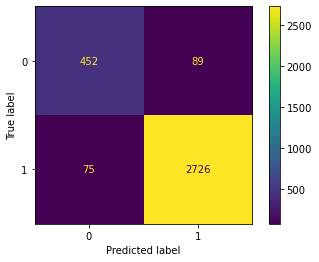

In [193]:
# from previous output 
rf_clf_search= RandomForestClassifier(n_estimators=1400,
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   max_features='auto',
                                   max_depth=110,
                                   bootstrap=True)

rf_clf_search.fit(X_train_res,y_train_res)
y_rf_opt=rf_clf_search.predict(X_test)

print('Random Forest Classifier (Optimized)')

print(classification_report(y_test, y_rf_opt))

_rf_opt=ConfusionMatrixDisplay.from_estimator(rf_clf_search, X_test, y_test)

#### Findings

1. accuracy and recall rate slightly increase
2. top-left corner (model successfully classifies a 0 class) increses, which means the model improves after fine-tuning 

### GB - Grid Search

In [194]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,100,10)}
param_test1

{'n_estimators': range(20, 100, 10)}

In [195]:
grid_search1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=1.0,  # 待搜索模型
                                                               min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=8,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10),
                        param_grid = param_test1, # 搜索参数
                        scoring='roc_auc',
                        n_jobs=4,
                        cv=5)

grid_search1.fit(X_train_res,y_train_res)

grid_search1.best_params_

{'n_estimators': 90}

#### 使用搜索参数建模

Gradient Boosting (Optimized)
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       541
           1       0.97      0.97      0.97      2801

    accuracy                           0.95      3342
   macro avg       0.91      0.91      0.91      3342
weighted avg       0.95      0.95      0.95      3342

0.8428835489833642


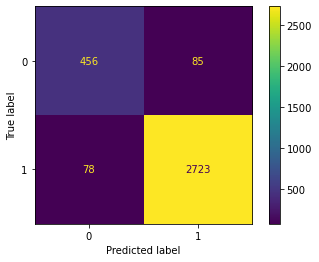

In [196]:
gb_clf_opt=GradientBoostingClassifier(n_estimators=90,  # previous output
                                      learning_rate=1.0,
                                      min_samples_split=500,
                                      min_samples_leaf=50,
                                      max_depth=8,
                                      max_features='sqrt',
                                      subsample=0.8,
                                      random_state=10)
# refit 
gb_clf_opt.fit(X_train_res,y_train_res)

y_gb_opt=gb_clf_opt.predict(X_test)
print('Gradient Boosting (Optimized)')
print(classification_report(y_test, y_gb_opt))

print(recall_score(y_test,y_gb_opt,pos_label=0))
_gbopt=ConfusionMatrixDisplay.from_estimator(gb_clf_opt, X_test, y_test)
_gbopt


#### Findings

1. Similar recall and accuracy to the original model. 
2. A slight increase in the top-left corner as well, despite not being too much. 

# Conclusion

This project consists of every steps in a conventional data science project, from data-processing to feature-engineering and from model-building model-tuning. The model produced achieves a 95% accuracy and 84.2% recall rate. 